In [2]:
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

csv_path = "../Project-1/EVstation_data (1).csv"
csv_path_2 = "..//Project-1/state_census_df.csv"

# EV Station Data

EVstation_data =pd.read_csv(csv_path)
EVstation_data



,State,city,Zipcode,latitude,longitude
0,CA,Sun Valley,91352,34.248319,-118.387971
1,CA,Los Angeles,90024,34.052542,-118.448504
2,CA,Rosemead,91770,34.050745,-118.081014
3,CA,Los Angeles,90015,34.040539,-118.271387
4,CA,Los Angeles,90012,34.059133,-118.248589
...,...,...,...,...,...
20546,CA,Los Angeles,90014,34.046715,-118.254364
20547,CA,Los Angeles,90014,34.046787,-118.255176
20548,CA,Los Angeles,90014,34.046791,-118.255188
20549,CA,Los Angeles,90014,34.046820,-118.255178


In [3]:
# Defining EV Station Data

#EVstation_data.dtypes

In [4]:
# Census Data

census_data = pd.read_csv(csv_path_2)
census_data

,State ID,Zipcode,Population,Number of Households,Household Income,Poverty Count,Poverty Rate,Total Commute Time,Average Commute Time,Total Vehicles,Average Vehicles per Household,State
0,30,59001,1558.0,734.0,58482.0,14.0,0.898588,679.0,0.925068,545.0,0.742507,MT
1,30,59002,127.0,47.0,37917.0,33.0,25.984252,52.0,1.106383,45.0,0.957447,MT
2,30,59003,1359.0,433.0,46838.0,362.0,26.637233,490.0,1.131640,325.0,0.750577,MT
3,30,59006,1461.0,518.0,44750.0,377.0,25.804244,543.0,1.048263,485.0,0.936293,MT
4,30,59007,172.0,66.0,105625.0,13.0,7.558140,72.0,1.090909,65.0,0.984848,MT
...,...,...,...,...,...,...,...,...,...,...,...,...
5351,53,99363,350.0,87.0,38011.0,298.0,85.142857,78.0,0.896552,NaN,NaN,WA
5352,53,99371,325.0,132.0,53750.0,54.0,16.615385,113.0,0.856061,100.0,0.757576,WA
5353,53,99401,642.0,176.0,67917.0,55.0,8.566978,189.0,1.073864,NaN,NaN,WA
5354,53,99402,1325.0,608.0,55595.0,84.0,6.339623,596.0,0.980263,510.0,0.838816,WA


In [5]:
# Is there a Correlation between the number of Household income of a Zipcode and the Number of EV Chargers

In [34]:
# EV Chargers By Zipcode

zipcode_df = EVstation_data.groupby('Zipcode').size().reset_index(name='counts')
zipcode_df


,Zipcode,counts
0,00987,1
1,55301,1
2,59011,1
3,59020,1
4,59024,1
...,...,...
2422,99403,1
2423,89423,1
2424,90032,1
2425,94583,1


In [7]:
# Defining Data types (Chargers)

#zipcode_df.dtypes

In [8]:
# Convert Zipcode to STR

zipcode_df["Zipcode"] = zipcode_df["Zipcode"].astype(str)
zipcode_df

,Zipcode,counts
0,00987,1
1,55301,1
2,59011,1
3,59020,1
4,59024,1
...,...,...
2422,99403,1
2423,89423,1
2424,90032,1
2425,94583,1


In [9]:
# Sorted Chargers Per Zipcode
sorted_zip_charger = zipcode_df.sort_values("counts", ascending=False)
sorted_zip_charger

,Zipcode,counts
1489,94025,361
1676,95054,259
1245,92618,220
1505,94080,171
1286,92802,137
...,...,...
1186,92356,1
1187,92357,1
1193,92377,1
1194,92382,1


In [10]:
# Count of Chargers per State

state_charger_df = EVstation_data.groupby('State').size().reset_index(name='counts')
state_charger_df


,State,counts
0,AZ,803
1,CA,13899
2,CO,1489
3,ID,136
4,MT,70
5,NM,171
6,NV,449
7,OR,939
8,UT,845
9,WA,1686


In [11]:
# Sorted Chargers Per State
sorted_state_charger = state_charger_df.sort_values("counts", ascending=False)
sorted_state_charger

,State,counts
1,CA,13899
9,WA,1686
2,CO,1489
7,OR,939
8,UT,845
0,AZ,803
6,NV,449
5,NM,171
3,ID,136
4,MT,70


In [12]:
# Income Grouped by Zipcode

income_zipcode = census_data[["Zipcode", "Household Income"]]
income_zipcode


,Zipcode,Household Income
0,59001,58482.0
1,59002,37917.0
2,59003,46838.0
3,59006,44750.0
4,59007,105625.0
...,...,...
5351,99363,38011.0
5352,99371,53750.0
5353,99401,67917.0
5354,99402,55595.0


In [13]:
# Defining Data Types (Income)

#income_zipcode.dtypes

In [14]:
# Changing Zipcode to STR

income_zipcode["Zipcode"] = income_zipcode["Zipcode"].astype(str)
income_zipcode

<ipython-input-14-8e7f91e77f2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_zipcode["Zipcode"] = income_zipcode["Zipcode"].astype(str)


,Zipcode,Household Income
0,59001,58482.0
1,59002,37917.0
2,59003,46838.0
3,59006,44750.0
4,59007,105625.0
...,...,...
5351,99363,38011.0
5352,99371,53750.0
5353,99401,67917.0
5354,99402,55595.0


In [15]:
# Merged Income and Charge Zipcodes

merged_income_chargers = pd.merge(zipcode_df, income_zipcode, on="Zipcode", how="left")
merged_income_chargers.head()

,Zipcode,counts,Household Income
0,00987,1,NaN
1,55301,1,NaN
2,59011,1,49754.0
3,59020,1,36875.0
4,59024,1,53136.0


In [16]:
#Dirty Count of Dataframe

len(merged_income_chargers)


2427

In [17]:
# Dropping NA Datapoints

clean_income_chargers = merged_income_chargers.dropna()
clean_income_chargers

,Zipcode,counts,Household Income
2,59011,1,49754.0
3,59020,1,36875.0
4,59024,1,53136.0
5,59030,1,51694.0
6,59035,1,47292.0
...,...,...,...
2418,99352,6,81410.0
2419,99354,46,73369.0
2420,99361,1,69118.0
2421,99362,15,56665.0


In [18]:
#Clean Count of Dataframe
len(clean_income_chargers)

2345

In [19]:
# Sorted Clean Dataframe without NA
sorted_clean_income_chargers = clean_income_chargers.sort_values("Household Income", ascending=False)
sorted_clean_income_chargers

,Zipcode,counts,Household Income
1490,94027,3,250001.0
1488,94024,6,250001.0
1491,94028,3,234091.0
1487,94022,28,223859.0
1881,95837,4,219063.0
...,...,...,...
1986,97135,1,-666666666.0
245,81330,1,-666666666.0
1019,91608,16,-666666666.0
978,91330,8,-666666666.0


In [20]:
# Dropped Household incomes less than $0

clean_income_chargers_v2 = clean_income_chargers[clean_income_chargers["Household Income"] > 0]

clean_income_chargers_v2 


,Zipcode,counts,Household Income
2,59011,1,49754.0
3,59020,1,36875.0
4,59024,1,53136.0
5,59030,1,51694.0
6,59035,1,47292.0
...,...,...,...
2418,99352,6,81410.0
2419,99354,46,73369.0
2420,99361,1,69118.0
2421,99362,15,56665.0


<AxesSubplot:xlabel='counts', ylabel='Household Income'>

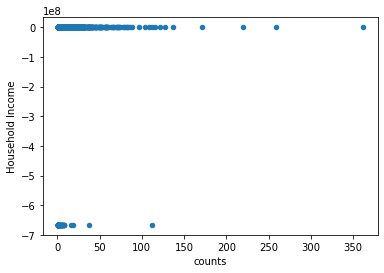

In [21]:
#Scatter Plot v1 Including incomes less than 0

clean_income_chargers.plot.scatter(x = "counts",
                                   y = "Household Income",)



<AxesSubplot:xlabel='counts', ylabel='Household Income'>

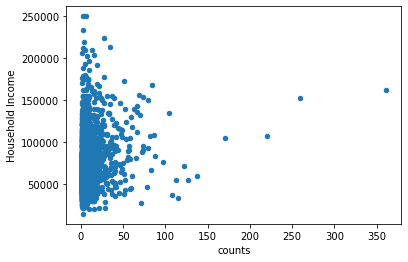

In [22]:
#Scatter Plot v2 Household Incomes Greater than 0

clean_income_chargers_v2.plot.scatter(x = "counts",
                                   y = "Household Income",)



Text(0.5, 1.0, 'The Number of Chargers Compared to Household Income Per Zipcode')

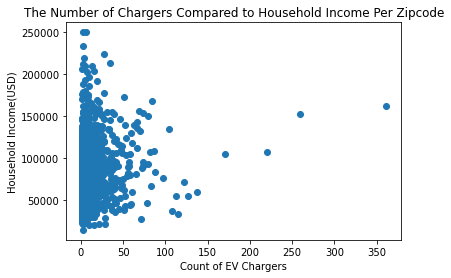

In [33]:
# Scatter Plot and Correlation

x_values = clean_income_chargers_v2["counts"]
y_values = clean_income_chargers_v2["Household Income"]
plt.scatter(x_values,y_values)

plt.xlabel("Count of EV Chargers")
plt.ylabel("Household Income(USD)")
plt.title("The Number of Chargers Compared to Household Income Per Zipcode")

In [24]:
# Regression and Correlation:

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.19


In [25]:
# Is there a Correlation between the Poverty Count Per Zipcode and the number of EV Chargers?

In [26]:
# Poverty Count and Zipcode

zipcode_poverty = census_data[["Zipcode", "Poverty Count"]]
zipcode_poverty.head()



,Zipcode,Poverty Count
0,59001,14.0
1,59002,33.0
2,59003,362.0
3,59006,377.0
4,59007,13.0


In [27]:
# Defining Dateframe Types

#zipcode_poverty.dtypes

In [28]:
zipcode_poverty["Zipcode"] = zipcode_poverty["Zipcode"].astype(str)
zipcode_poverty

<ipython-input-28-dd46c1686a96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_poverty["Zipcode"] = zipcode_poverty["Zipcode"].astype(str)


,Zipcode,Poverty Count
0,59001,14.0
1,59002,33.0
2,59003,362.0
3,59006,377.0
4,59007,13.0
...,...,...
5351,99363,298.0
5352,99371,54.0
5353,99401,55.0
5354,99402,84.0


In [29]:
# Merged Poverty Count and Charger Zipcode

merged_poverty_charger = pd.merge(zipcode_df, zipcode_poverty, on="Zipcode", how="left")
merged_poverty_charger

,Zipcode,counts,Poverty Count
0,00987,1,NaN
1,55301,1,NaN
2,59011,1,179.0
3,59020,1,0.0
4,59024,1,35.0
...,...,...,...
2422,99403,1,2656.0
2423,89423,1,NaN
2424,90032,1,NaN
2425,94583,1,NaN


In [30]:
# Cleaned Merged Poverty Count and Charger Zipcode

clean_merged_poverty_charger = merged_poverty_charger.dropna()
clean_merged_poverty_charger



,Zipcode,counts,Poverty Count
2,59011,1,179.0
3,59020,1,0.0
4,59024,1,35.0
5,59030,1,140.0
6,59035,1,28.0
...,...,...,...
2418,99352,6,1640.0
2419,99354,46,3276.0
2420,99361,1,210.0
2421,99362,15,4683.0


Text(0.5, 1.0, 'The Number of Chargers Compared to Poverty Count Per Zipcode')

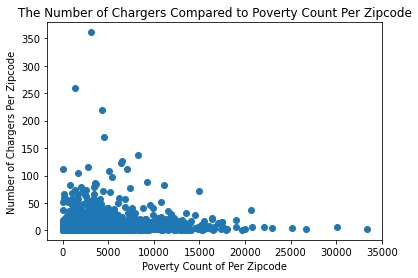

In [31]:
# Plotting Merged Poverty Count and Charger Count


x2_values = clean_merged_poverty_charger["Poverty Count"]
y2_values = clean_merged_poverty_charger["counts"]
plt.scatter(x2_values,y2_values)

plt.xlabel("Poverty Count of Per Zipcode")
plt.ylabel("Number of Chargers Per Zipcode")
plt.title("The Number of Chargers Compared to Poverty Count Per Zipcode")


In [32]:
# Correlation

correlation = st.pearsonr(x2_values,y2_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.09
